In [1]:
import os
os.chdir(r'C:\Users\82107\Desktop\Study\ML learning')
print('current directory:', os.getcwd())

current directory: C:\Users\82107\Desktop\Study\ML learning


In [6]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import layers
# 행렬을 다루기 위한 모듈을 불러온다.
import numpy as np 
# plot을 그리기 위한 모듈을 불러온다.
import matplotlib.pyplot as plt
# sklearn으로부터 데이터를 불러온다.
import sklearn
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston')

x_data, y_data = boston.data, boston.target
# data scaling
x_data = sklearn.preprocessing.scale(x_data, axis=0)    #표준화를 진행해줌
x_data.shape

c:\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(506, 13)

In [7]:
y_data.shape

(506,)

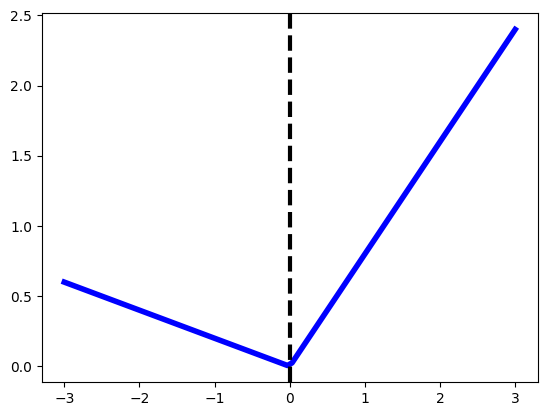

In [10]:
# check function
tau = 0.8
t = np.linspace(-3, 3, num=100, endpoint=True)
plt.plot(t, np.max((tau*t, (tau-1)*t), axis=0), '-', color='blue', linewidth=4)
plt.axvline(x=0, linestyle='--', c='black', linewidth=3)

In [11]:
# 분위수 값 설정
tau = 0.2
input_layer = layers.Input((x_data.shape[1]))
dense_layer1 = layers.Dense(5, activation='sigmoid')
x = dense_layer1(input_layer)
dense_layer2 = layers.Dense(1, activation='linear')
x = dense_layer2(x)

model = K.models.Model(input_layer, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 5)                 70        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 76 (304.00 Byte)
Trainable params: 76 (304.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
optimizer = K.optimizers.SGD(learning_rate=0.5)

def quantile_loss(q, y, y_pred):
    r = y - y_pred
    l = tf.reduce_mean(tf.maximum(tau*r, (tau-1)*r), axis=0, keepdims=False)
    return l

epochs = 500
batch_size = 128
for epoch in range(epochs):
    idx = np.random.randint(0, len(y_data), batch_size)
    x_batch = tf.cast(x_data[idx, :], tf.float32)
    y_batch = tf.cast(np.array(y_data[idx])[:, np.newaxis], tf.float32)
    
    with tf.GradientTape() as tape:
        y_hat = model(x_batch)
        loss = quantile_loss(tau, y_batch, y_hat)
    
    grad = tape.gradient(loss, model.weights)   #current solution을 받아오고 loss를 이용하여 gradient를 계산하고 그 gradient를 저장함
    optimizer.apply_gradients(zip(grad, model.weights)) #gradient를 model weight에 반영해줌
    
    if epoch % 10 == 0:
        print('({} epoch: loss: {:.6})'.format(epoch, loss.numpy()[0]))

(0 epoch: loss: 4.54684)
(10 epoch: loss: 4.03094)
(20 epoch: loss: 3.50634)
(30 epoch: loss: 3.14204)
(40 epoch: loss: 2.5423)
(50 epoch: loss: 1.98785)
(60 epoch: loss: 1.48345)
(70 epoch: loss: 1.13893)
(80 epoch: loss: 1.10319)
(90 epoch: loss: 1.26733)
(100 epoch: loss: 1.20167)
(110 epoch: loss: 0.857206)
(120 epoch: loss: 0.938108)
(130 epoch: loss: 1.10317)
(140 epoch: loss: 0.908184)
(150 epoch: loss: 0.843724)
(160 epoch: loss: 1.08836)
(170 epoch: loss: 0.84798)
(180 epoch: loss: 1.20616)
(190 epoch: loss: 0.991467)
(200 epoch: loss: 1.15939)
(210 epoch: loss: 0.838558)
(220 epoch: loss: 0.946781)
(230 epoch: loss: 0.819768)
(240 epoch: loss: 0.861336)
(250 epoch: loss: 0.833803)
(260 epoch: loss: 0.947504)
(270 epoch: loss: 0.929165)
(280 epoch: loss: 0.911293)
(290 epoch: loss: 0.945565)
(300 epoch: loss: 0.978924)
(310 epoch: loss: 0.734899)
(320 epoch: loss: 0.732095)
(330 epoch: loss: 1.05862)
(340 epoch: loss: 0.700701)
(350 epoch: loss: 0.821317)
(360 epoch: loss: 0.8

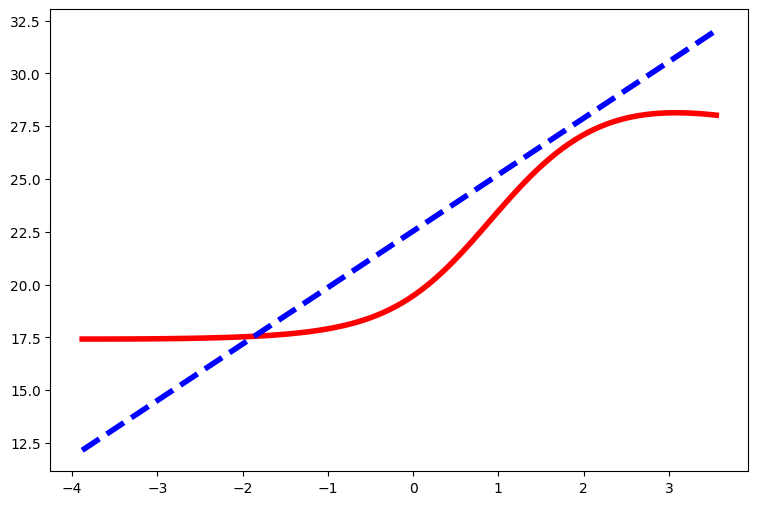

In [16]:
# prediction
room = np.linspace(np.min(x_data[:, 5]), np.max(x_data[:, 5]), 100)
new_data = np.zeros((100, x_data.shape[1]))
new_data[:, 5] = room
# 신경망 모형 예측
nn_pred = model(tf.cast(new_data, tf.float32))

# 선형회귀모형을 사용할 수 있는 모듈을 불러온다.
import statsmodels.api as sm
# 단순 선형회귀모형 적합과 예측
simple_reg = sm.OLS(y_data, sm.add_constant(x_data)).fit()
simple_reg_pred = simple_reg.predict(sm.add_constant(new_data))

# 시각화
plt.figure(figsize=(9, 6))
plt.plot(room, np.squeeze(nn_pred.numpy()), '-', color='red', linewidth=4)
plt.plot(room, simple_reg_pred, '--', color='blue', linewidth=4)

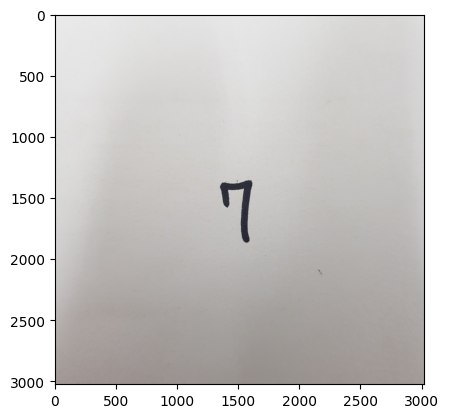

In [17]:
# jpg 형식의 image를 불러오기 위한 모듈을 불러온다. (RGB 채널 인식)
import matplotlib.image as mpimg 
# 행렬을 다루기 위한 모듈을 불러온다.
import numpy as np 
# plot을 그리기 위한 모듈을 불러온다.
import matplotlib.pylab as plt 

img_mat1 = np.rot90(mpimg.imread('./test_img1.jpg'), 3)
plt.imshow(img_mat1)

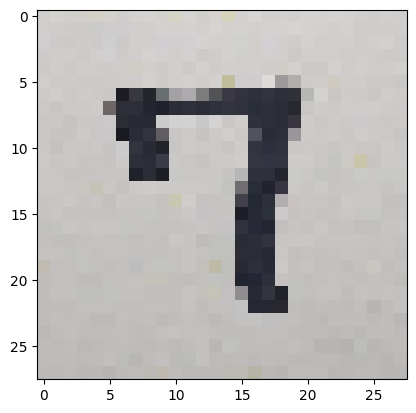

In [19]:
import cv2
img_cropped1 = img_mat1[1200:2000, 1250:1750, :]
img_resized1 = cv2.resize(img_cropped1, dsize=(28, 28))
img_resized1.shape
plt.imshow(img_resized1)

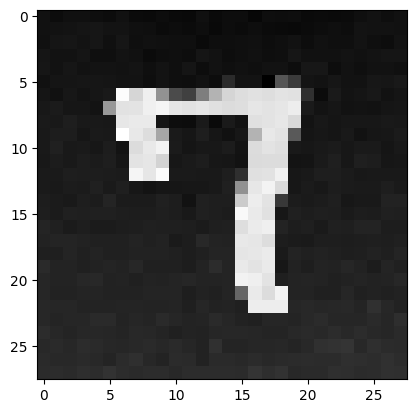

In [20]:
def rgb2grayscale(img): 
    return np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
img_gray1 = rgb2grayscale(img_resized1)
# scaling과 흑백반전
img_input1 = (255.0 - img_gray1) / 255.0
plt.imshow(img_input1, cmap='gray')

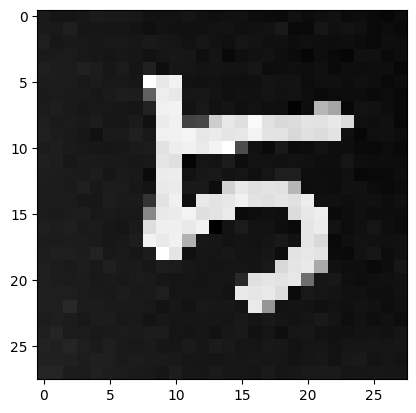

In [21]:
# 다른 이미지 예시

img_mat2 = np.rot90(mpimg.imread('./test_img2.jpg'), 3)
# cropping and reshape
img_cropped2 = img_mat2[1350:2000, 1100:1700, :]
img_resized2 = cv2.resize(img_cropped2, dsize=(28, 28))
# model의 입력에 맞게 사진을 전처리
# 이미지를 회색조로 변환
img_gray2 = rgb2grayscale(img_resized2)
# scaling과 흑백반전
img_input2 = (255.0 - img_gray2) / 255.0
plt.imshow(img_input2, cmap='gray')

In [23]:
# mnist dataset을 제공하는 tensorflow 모듈을 불러온다.
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import layers
mnist = K.datasets.mnist

num_classes = 10
img_rows = img_cols = 28
input_shape = [img_rows, img_cols, 1]

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0   #값을 0과 1 사이로 설정
x_train = x_train.reshape((len(x_train), img_rows*img_cols))
x_test = x_test.reshape((len(x_test), img_rows*img_cols))
x_train.shape

(60000, 784)

In [24]:
y_train = K.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_test = K.utils.to_categorical(y_test, num_classes=10, dtype='float32')
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [25]:
input_layer = layers.Input((img_rows*img_cols))
dense_layer = layers.Dense(units=num_classes, activation='linear')
x = dense_layer(input_layer)

linear_model = K.models.Model(input_layer, x)
linear_model.summary()

linear_model.compile(optimizer='rmsprop',
                     loss='mse',
                     metrics=['mse'])
linear_model.fit(x_train, y_train,
                 batch_size=1024,
                 epochs=100,
                 validation_split=0.2)

#validation loss에 비해 loss값이 작으면 과적합이다

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
47/47 [==============================] - 0s 4ms/step - loss: 0.1070 - mse: 0.1070 - val_loss: 0.0675 - val_mse: 0.0675
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 4/100
47/47 [=========